In [ ]:
import os
import torch

REPO_URL = "https://github.com/thenileshmishra/AS-RoPE.git"
REPO_DIR = "/content/AS-RoPE"

if not os.path.exists(REPO_DIR):
    !git clone {REPO_URL} {REPO_DIR}
%cd {REPO_DIR}
!git pull

%pip install -q -r requirements.txt

# Verify critical files exist
!ls -la as_rope.py model.py rope.py train.py eval_perplexity.py

print('cuda_available=', torch.cuda.is_available())
if torch.cuda.is_available():
    print('gpu=', torch.cuda.get_device_name(0))

/content/AS-RoPE
Already up to date.
cuda_available= True
gpu= NVIDIA A100-SXM4-40GB


In [3]:
!python train.py \
  --seed 42 \
  --steps 2000 \
  --eval_interval 100 \
  --save_interval 2000 \
  --batch_size 8 \
  --block_size 1024 \
  --max_seq_len 8192 \
  --max_tokens 120000 \
  --checkpoint_path checkpoint_rope.pt \
  --metrics_path logs/rope_metrics.csv

Training on cuda
Parameters: 17.60M
use_as_rope=False
step    1 | train_loss 220.6299 | eval_loss 187.2761 | eval_ppl 2152716459906428978891779061430311182221223380367605791817579815617351352103993344.0000 | 0.9s
step  100 | train_loss 21.8992 | eval_loss 22.2225 | eval_ppl 4478428293.0948 | 13.4s
step  200 | train_loss 14.0313 | eval_loss 14.6057 | eval_ppl 2203707.7827 | 26.0s
step  300 | train_loss 10.1858 | eval_loss 9.8381 | eval_ppl 18735.0067 | 38.6s
step  400 | train_loss 7.7971 | eval_loss 7.9087 | eval_ppl 2720.8575 | 51.1s
step  500 | train_loss 6.8812 | eval_loss 6.7897 | eval_ppl 888.6614 | 63.7s
step  600 | train_loss 6.2802 | eval_loss 5.8864 | eval_ppl 360.0895 | 76.3s
step  700 | train_loss 5.3517 | eval_loss 5.6298 | eval_ppl 278.6058 | 88.9s
step  800 | train_loss 5.0701 | eval_loss 5.2187 | eval_ppl 184.7013 | 101.5s
step  900 | train_loss 5.0874 | eval_loss 4.6899 | eval_ppl 108.8460 | 114.1s
step 1000 | train_loss 4.5141 | eval_loss 4.9387 | eval_ppl 139.5949 | 12

In [11]:
!python train.py \
  --seed 42 \
  --steps 2000 \
  --eval_interval 100 \
  --save_interval 2000 \
  --batch_size 8 \
  --block_size 1024 \
  --max_seq_len 8192 \
  --max_tokens 120000 \
  --use_as_rope \
  --checkpoint_path checkpoint_as_rope.pt \
  --metrics_path logs/as_rope_metrics.csv

Training on cuda
Parameters: 17.60M
use_as_rope=True
step    1 | train_loss 220.6299 | eval_loss 187.2761 | eval_ppl 2152716459906428978891779061430311182221223380367605791817579815617351352103993344.0000 | 0.5s
step  100 | train_loss 21.8992 | eval_loss 22.2225 | eval_ppl 4478428293.0948 | 13.0s
step  200 | train_loss 14.0313 | eval_loss 14.6057 | eval_ppl 2203707.7827 | 25.5s
step  300 | train_loss 10.1858 | eval_loss 9.8381 | eval_ppl 18735.0067 | 38.1s
step  400 | train_loss 7.7971 | eval_loss 7.9087 | eval_ppl 2720.8575 | 50.7s
step  500 | train_loss 6.8812 | eval_loss 6.7897 | eval_ppl 888.6614 | 63.3s
step  600 | train_loss 6.2802 | eval_loss 5.8864 | eval_ppl 360.0895 | 75.9s
step  700 | train_loss 5.3517 | eval_loss 5.6298 | eval_ppl 278.6058 | 88.4s
step  800 | train_loss 5.0701 | eval_loss 5.2187 | eval_ppl 184.7013 | 101.0s
step  900 | train_loss 5.0874 | eval_loss 4.6899 | eval_ppl 108.8460 | 113.6s
step 1000 | train_loss 4.5141 | eval_loss 4.9387 | eval_ppl 139.5949 | 126

In [9]:
!python eval_perplexity.py \
  --checkpoint_path checkpoint_rope.pt \
  --context_lengths 1024,2048,4096,8192 \
  --max_eval_tokens 32768

context=1024 ppl=50.502077
context=2048 ppl=301.413440
context=4096 ppl=613.158939
context=8192 ppl=366.712692
degradation_beyond_1024=True


In [12]:
!python eval_perplexity.py \
  --checkpoint_path checkpoint_as_rope.pt \
  --context_lengths 1024,2048,4096,8192 \
  --max_eval_tokens 32768

Traceback (most recent call last):
  File "/content/AS-RoPE/eval_perplexity.py", line 192, in <module>
    main()
  File "/content/AS-RoPE/eval_perplexity.py", line 145, in main
    model.load_state_dict(checkpoint["model_state_dict"])
  File "/usr/local/lib/python3.12/dist-packages/torch/nn/modules/module.py", line 2635, in load_state_dict
    raise RuntimeError(
RuntimeError: Error(s) in loading state_dict for GPT:
	Missing key(s) in state_dict: "freq_gates". 


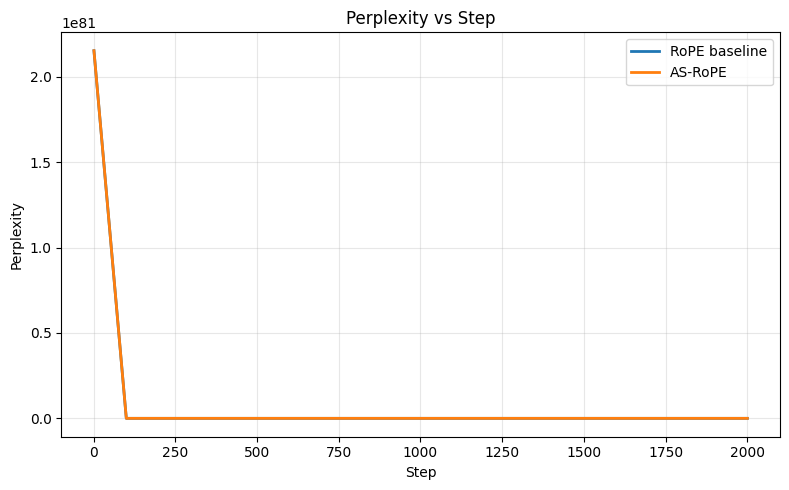

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

rope = pd.read_csv('logs/rope_metrics.csv')
as_rope = pd.read_csv('logs/as_rope_metrics.csv')

plt.figure(figsize=(8,5))
plt.plot(rope['step'], rope['eval_ppl'], label='RoPE baseline', linewidth=2)
plt.plot(as_rope['step'], as_rope['eval_ppl'], label='AS-RoPE', linewidth=2)
plt.xlabel('Step')
plt.ylabel('Perplexity')
plt.title('Perplexity vs Step')
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()